In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\Sujay J\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from scipy import stats
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')

In [3]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader,Dataset , SVD 
from surprise.model_selection import cross_validate

In [5]:
data = pd.read_csv('movies_metadata.csv')

In [6]:
data.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [7]:
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [8]:
data['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = (v/v+m.R)+(m/v+m.C)
where,

#. v is the number of votes for the movie
#. m is the minimum votes required to be listed in the chart
#. R is the average rating of the movie
#. C is the mean vote across the whole report
The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

  



In [9]:
vote_counts = data[data['vote_count'].notnull()]['vote_count'].astype('int')

In [10]:
vote_average = data[data['vote_average'].notnull()]['vote_average'].astype('int')

In [11]:
c = vote_average.mean()

In [12]:
m = vote_counts.quantile(0.95)

In [13]:
data['year'] = pd.to_datetime(data['release_date'],errors='coerce').apply(lambda x : str(x).split('-')[0] if x != np.nan else np.nan)

In [14]:
data['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461     NaT
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45466, dtype: object

In [15]:
qualified = data[(data['vote_count'] >= m) & (data['vote_count'].notnull()) & (data['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]

In [16]:
qualified['vote_count']=qualified['vote_count'].astype('int')

In [17]:
qualified['vote_average']=qualified['vote_average'].astype('int')

In [18]:
qualified

,title,year,vote_count,vote_average,popularity,genres
0,Toy Story,1995,5415,7,21.9469,"[Animation, Comedy, Family]"
1,Jumanji,1995,2413,6,17.0155,"[Adventure, Fantasy, Family]"
5,Heat,1995,1886,7,17.9249,"[Action, Crime, Drama, Thriller]"
9,GoldenEye,1995,1194,6,14.686,"[Adventure, Action, Thriller]"
15,Casino,1995,1343,7,10.1374,"[Drama, Crime]"
...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]"
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]"
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]"
44842,Transformers: The Last Knight,2017,1440,6,39.186819,"[Action, Science Fiction, Thriller, Adventure]"


In [19]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return(v/(v+m)*R)+(m/(m+v)*c)

In [20]:
qualified['wr']= qualified.apply(weighted_rating,axis=1)

In [21]:
qualified

,title,year,vote_count,vote_average,popularity,genres,wr
0,Toy Story,1995,5415,7,21.9469,"[Animation, Comedy, Family]",6.869770
1,Jumanji,1995,2413,6,17.0155,"[Adventure, Fantasy, Family]",5.884891
5,Heat,1995,1886,7,17.9249,"[Action, Crime, Drama, Thriller]",6.671675
9,GoldenEye,1995,1194,6,14.686,"[Adventure, Action, Thriller]",5.798701
15,Casino,1995,1343,7,10.1374,"[Drama, Crime]",6.571348
...,...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]",6.261904
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]",5.722745
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]",6.757878
44842,Transformers: The Last Knight,2017,1440,6,39.186819,"[Action, Science Fiction, Thriller, Adventure]",5.825125


In [22]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [23]:
qualified.head(20)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


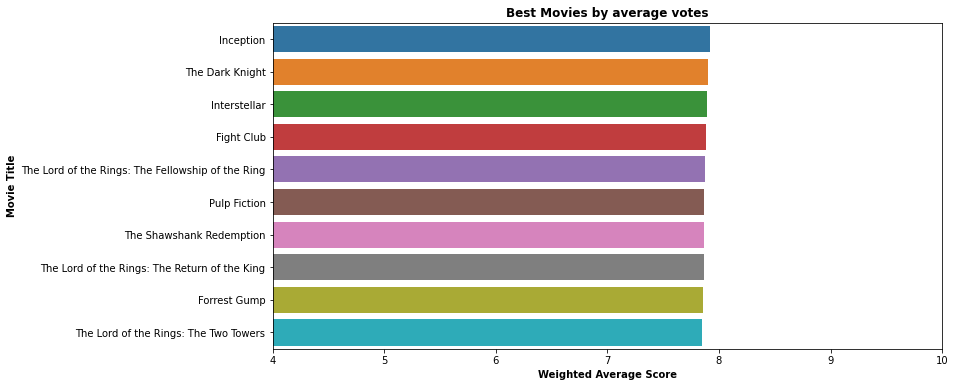

In [24]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=qualified['wr'].head(10), y=qualified['title'].head(10), data=qualified)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

In [25]:
s = data.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)

In [26]:
s.name = 'genre'

In [27]:
gen_data = data.drop('genres',axis=1).join(s)

In [28]:
gen_data

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Family
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Adventure
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Action
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Drama
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Thriller
45464,False,NaN,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,NaN


In [29]:
def genre_table(genres , percentile=0.85):
    df=gen_data[gen_data['genre']==genres]
    vote_counts=df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages=df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C=vote_averages.mean()
    m=vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified


In [30]:
genre_table('Animation').head(5)

,title,year,vote_count,vote_average,popularity,wr
359,The Lion King,1994,5520,8,21.6058,7.909339
5481,Spirited Away,2001,3968,8,41.0489,7.875933
9698,Howl's Moving Castle,2004,2049,8,16.136,7.772103
2884,Princess Mononoke,1997,2041,8,17.1667,7.771305
5833,My Neighbor Totoro,1988,1730,8,13.5073,7.735274


Content Based Recommender
The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.

For instance, consider a person who loves Dilwale Dulhania Le Jayenge, My Name is Khan and Kabhi Khushi Kabhi Gham. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if s/he were to access the romance chart, s/he wouldn't find these as the top recommendations.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as Content Based Filtering.
I will build two Content Based Recommenders based on:

Movie Overviews and Taglines. 
Movie Cast, Crew, Keywords and Genre. 
Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available to me.

In [31]:
links_small = pd.read_csv("links_small.csv")

In [32]:
links_small.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [33]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype("int")

In [34]:
data[data['id'] == '1997-08-20']['id']

19730    1997-08-20
Name: id, dtype: object

In [35]:
data = data.drop([19730, 29503, 35587])

In [36]:
data['id']=data['id'].astype("int")

In [37]:
smd = data[data['id'].isin(links_small)]
smd.shape

(9099, 25)

Let us first try to build a recommender using movie descriptions and taglines. We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [38]:
smd['tagline'] = smd['tagline'].fillna('')

In [39]:
smd['description'] = smd['overview']+smd['tagline']

In [40]:
smd['description']=smd['description'].fillna('')

In [41]:
smd['description'].isnull().sum()

0

In [42]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [43]:
tf

TfidfVectorizer(min_df=0, ngram_range=(1, 2), stop_words='english')

In [44]:
tfidf_matrix = tf.fit_transform(smd['description'])

In [45]:
tfidf_matrix.shape

(9099, 268124)

Cosine Similarity
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [46]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [47]:
cosine_sim.shape

(9099, 9099)

We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [48]:
smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index,index=smd['title'])

In [49]:
def get_recommendations(title):
    idx = indices[title]
    sim_score = list(enumerate(cosine_sim[idx]))
    sim_score = sorted(sim_score,key = lambda x:x[1],reverse=True)
    sim_score=sim_score[1:31]
    movie_indicies = [i[0] for i in sim_score]
    return titles.iloc[movie_indicies]

In [50]:
get_recommendations('Summertime').head(10)

7045                     The Pick-up Artist
654                                Faithful
5654                           Roger Dodger
21555                                  Koch
20132                 The Central Park Five
12544                           The Visitor
15267                           Please Give
6223                         Down with Love
7283                     Laws of Attraction
3265     The Taking of Pelham One Two Three
Name: title, dtype: object

In [51]:
def get_recommendationss(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]


In [52]:
get_recommendationss('The Godfather').head(10)

2697                         In Too Deep
2147                     Blame It on Rio
7991                       The Snake Pit
4305                 Written on the Wind
338                The Baby-Sitters Club
3040                       Stuart Little
6875                           Silverado
16621                No Strings Attached
2731     The Adventures of Milo and Otis
24243                               Tusk
Name: title, dtype: object

# Metadata Based Recommender
To build our standard metadata based content recommender, we will need to merge our current dataset with the crew and the keyword datasets. Let us prepare this data as our first step.

In [53]:
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [54]:
keywords['id']=keywords['id'].astype('int')
credits['id']=credits['id'].astype('int')
data['id']=data['id'].astype('int')

In [55]:
data.shape

(45463, 25)

In [56]:
data = data.merge(credits,on='id')
data = data.merge(keywords,on='id')

In [57]:
smd = data[data['id'].isin(links_small)]
smd.shape

(9219, 28)

In [58]:
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [59]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [60]:
smd['director'] = smd['crew'].apply(get_director)

In [61]:
smd[0:1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",13,106,John Lasseter


In [62]:
smd['cast'] = smd['cast'].apply(lambda x:[i['name']for i in x] if isinstance(x,list)else[])

In [63]:
smd.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,1995,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",13,106,John Lasseter
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",26,16,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",7,4,Howard Deutch
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",10,10,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",12,7,Charles Shyer


In [64]:
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [65]:
smd['keywords'] = smd['keywords'].apply(lambda x:[i['name']for i in x]if isinstance(x,list)else [])

In [66]:
smd.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,1995,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",13,106,John Lasseter
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",26,16,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",7,4,Howard Deutch
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",10,10,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",12,7,Charles Shyer


My approach to building the recommender is going to be extremely hacky. What I plan on doing is creating a metadata dump for every movie which consists of genres, director, main actors and keywords. I then use a Count Vectorizer to create our count matrix as we did in the Description Recommender. The remaining steps are similar to what we did earlier: we calculate the cosine similarities and return movies that are most similar.

These are steps I follow in the preparation of my genres and credits data:

1. Strip Spaces and Convert to Lowercase from all our features. This way, our engine will not confuse between Johnny Depp and Johnny Galecki.  
2. Mention Director 3 times to give it more weight relative to the entire cast.

In [67]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])


In [68]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

#### Keywords
We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [69]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'


In [70]:
s= s.value_counts()

In [71]:
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

Keywords occur in frequencies ranging from 1 to 610. We do not have any use for keywords that occur only once. Therefore, these can be safely removed. Finally, we will convert every word to its stem so that words such as Dogs and Dog are considered the same.


In [72]:
s=s[s>1]

In [73]:
stemmer = SnowballStemmer('english')
stemmer.stem("directors")

'director'

In [74]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [75]:
smd['keywords']

0        [jealousy, toy, boy, friendship, friends, riva...
1        [board game, disappearance, based on children'...
2        [fishing, best friend, duringcreditsstinger, o...
3        [based on novel, interracial relationship, sin...
4        [baby, midlife crisis, confidence, aging, daug...
                               ...                        
40952                           [friendship, brick making]
41172                                          [bollywood]
41225                                          [bollywood]
41391    [monster, godzilla, giant monster, destruction...
41669                                 [music, documentary]
Name: keywords, Length: 9219, dtype: object

In [76]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)

In [77]:
smd['keywords']

0        [jealousy, toy, boy, friendship, friends, riva...
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4        [baby, midlife crisis, confidence, aging, daug...
                               ...                        
40952                                         [friendship]
41172                                          [bollywood]
41225                                          [bollywood]
41391    [monster, godzilla, giant monster, destruction...
41669                                 [music, documentary]
Name: keywords, Length: 9219, dtype: object

In [78]:
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])

In [79]:
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [80]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']

In [81]:
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

In [82]:
smd['soup']

0        jealousi toy boy friendship friend rivalri boy...
1        boardgam disappear basedonchildren'sbook newho...
2        fish bestfriend duringcreditssting waltermatth...
3        basedonnovel interracialrelationship singlemot...
4        babi midlifecrisi confid age daughter motherda...
                               ...                        
40952    friendship sidneypoitier wendycrewson jayo.san...
41172    bollywood akshaykumar ileanad'cruz eshagupta t...
41225    bollywood hrithikroshan poojahegde kabirbedi a...
41391    monster godzilla giantmonst destruct kaiju hir...
41669    music documentari paulmccartney ringostarr joh...
Name: soup, Length: 9219, dtype: object

In [83]:
count = CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

In [84]:
count_matrix[0]

<1x107377 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [85]:
cosine_sime = cosine_similarity(count_matrix,count_matrix)

In [86]:
cosine_sime.shape

(9219, 9219)

In [87]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [88]:
get_recommendations('The Dark Knight').head(10)

173                        Species
3379                   Exit Wounds
6842    Far from the Madding Crowd
12                           Balto
6427                Curious George
6568                 Blithe Spirit
3635                The Dream Team
9066        Long-Term Relationship
1611            The Black Cauldron
2167        The General's Daughter
Name: title, dtype: object

In [89]:
get_recommendations('Mean Girls').head(10)

8243           The Ambassador
6650            Blood Diamond
2841       Where the Money is
5400            La Dolce Vita
2955           Prizzi's Honor
4481      The American Friend
4781             House of Wax
5618              Dead Ringer
5683                 Undertow
4946    Dance with a Stranger
Name: title, dtype: object

In [90]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key= lambda x:x[1],reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    movies = smd.iloc[movie_indices][['title','vote_count','vote_average','year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_average = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_average.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating,axis=1)
    qualified = qualified.sort_values('wr',ascending=False).head(10)
    return qualified


In [91]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,year,wr
12,Balto,423,7,1995,6.111185
990,Ran,349,7,1985,6.027184
1256,Con Air,1289,6,1997,5.809800
310,"The Adventures of Priscilla, Queen of the Desert",174,7,1994,5.747179
7447,This Is It,253,6,2009,5.522977
1611,The Black Cauldron,228,6,1985,5.504962
2167,The General's Daughter,209,6,1999,5.490335
3288,Can't Buy Me Love,167,6,1987,5.454717
173,Species,457,5,1995,5.119287
8422,The Bling Ring,1205,5,2013,5.064848


### Collaborative Filtering
Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

I will not be implementing Collaborative Filtering from scratch. Instead, I will use the Surprise library that used extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [92]:
reader = Reader()

In [93]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [94]:
df = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8952  0.8906  0.8976  0.9061  0.8973  0.8974  0.0050  
MAE (testset)     0.6896  0.6874  0.6925  0.6971  0.6910  0.6915  0.0033  
Fit time          3.99    4.02    4.08    3.98    4.17    4.05    0.07    
Test time         0.20    0.11    0.19    0.13    0.13    0.15    0.04    


{'test_rmse': array([0.89518887, 0.89060406, 0.8976283 , 0.90609037, 0.89725679]),
 'test_mae': array([0.68959622, 0.68736555, 0.69250552, 0.69710908, 0.69096119]),
 'fit_time': (3.992183208465576,
  4.017154932022095,
  4.076085805892944,
  3.983415126800537,
  4.16700291633606),
 'test_time': (0.20312809944152832,
  0.11272478103637695,
  0.18873357772827148,
  0.12500762939453125,
  0.12500619888305664)}

In [95]:
trainset = df.build_full_trainset()
svd.fit(trainset)

In [96]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [97]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.811754331544379, details={'was_impossible': False})

movie with ID 302, we get an estimated prediction of 2.686. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

### Hybrid Recommender

In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

Input: User ID and the Title of a Movie
Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [98]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [105]:
id_map = pd.read_csv('links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [106]:
indices_map = id_map.set_index('id')

In [103]:
indices_map

,movieId
id,
862.0,1
8844.0,2
15602.0,3
31357.0,4
11862.0,5
...,...
159550.0,161944
392572.0,162542
402672.0,162672


In [107]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [110]:
hybrid(3, 'The Dark Knight')

,title,vote_count,vote_average,year,id,est
990,Ran,349.0,7.9,1985,11645,4.155643
3635,The Dream Team,60.0,6.0,1989,14550,3.595070
7447,This Is It,253.0,6.7,2009,13576,3.582412
6427,Curious George,109.0,6.1,2006,9975,3.569151
9066,Long-Term Relationship,4.0,5.8,2006,77583,3.555660
3288,Can't Buy Me Love,167.0,6.7,1987,12919,3.543160
2923,The Fighting Seabees,14.0,6.4,1944,22994,3.517360
2296,Othello,35.0,6.5,1951,47697,3.443692
2118,Edge of Seventeen,29.0,5.7,1998,4927,3.441755
1611,The Black Cauldron,228.0,6.5,1985,10957,3.437414


#### Conclusion
In this notebook, I have built 4 different recommendation engines based on different ideas and algorithms. They are as follows:

1. Simple Recommender: This system used overall TMDB Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.
2. Content Based Recommender: We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.
3. Collaborative Filtering: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.
4. Hybrid Engine: We brought together ideas from content and collaborative filterting to build an engine that gave movie suggestions to a particular user based on the estimated ratings that it had internally calculated for that user.